In [56]:
import numpy as np
from matplotlib import pyplot as plt
import py_gauge_mc
import scipy.fft

from tqdm.notebook import tqdm

In [57]:
L = 32
k = 1.0

vns = [(n**2)*k for n in range(100)]
numpy_vns = np.array(vns)
graph = py_gauge_mc.GPUGaugeTheory(L,L,L,L,vns)
graph.run_local_update(10000)

In [58]:
state = graph.get_graph_state()
state.shape

(32, 32, 32, 32, 6)

In [59]:
state_fft = scipy.fft.fftn(state)

In [60]:
state_fft.shape

(32, 32, 32, 32, 6)

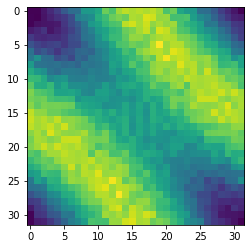

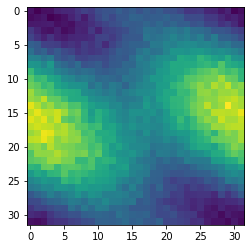

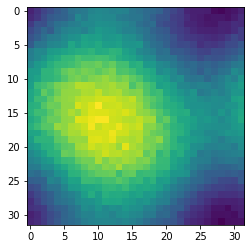

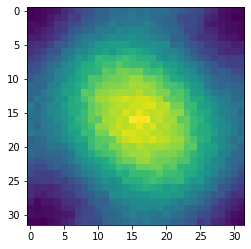

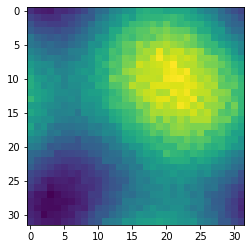

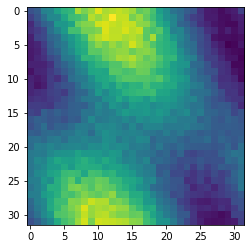

In [61]:
p_axes = [
    (2,3), # keep t, x
    (1,3), # keep t, y
    (1,2), # keep t, z
    (0,3), # keep x, y
    (0,2), # keep x, z
    (0,1), # keep y, z
]

for p, axes in enumerate(p_axes):
    plt.imshow(np.abs(state_fft[...,p]).mean(axis=axes))
    plt.show()

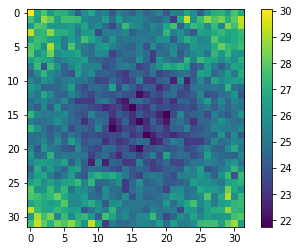

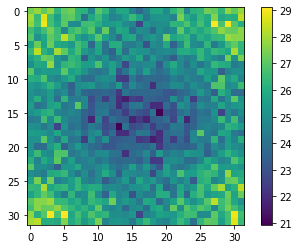

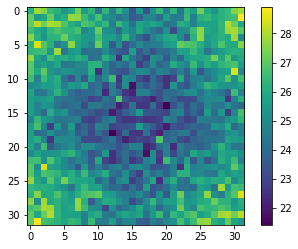

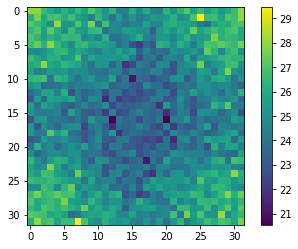

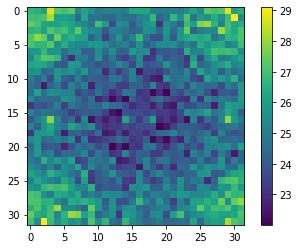

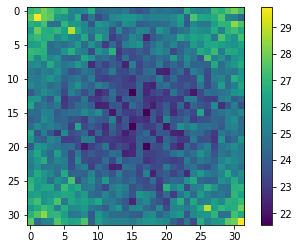

In [62]:
planes = np.array([state[:,:,i,j,0] for i in range(L) for j in range(L)])
plt.imshow((np.abs(scipy.fft.fft2(planes))**2).mean(axis=0))
plt.colorbar()
plt.show()

planes = np.array([state[:,i,:,j,1] for i in range(L) for j in range(L)])
plt.imshow((np.abs(scipy.fft.fft2(planes))**2).mean(axis=0))
plt.colorbar()
plt.show()


planes = np.array([state[:,i,j,:,2] for i in range(L) for j in range(L)])
plt.imshow((np.abs(scipy.fft.fft2(planes))**2).mean(axis=0))
plt.colorbar()
plt.show()

planes = np.array([state[i,:,:,j,3] for i in range(L) for j in range(L)])
plt.imshow((np.abs(scipy.fft.fft2(planes))**2).mean(axis=0))
plt.colorbar()
plt.show()

planes = np.array([state[i,:,j,:,4] for i in range(L) for j in range(L)])
plt.imshow((np.abs(scipy.fft.fft2(planes))**2).mean(axis=0))
plt.colorbar()
plt.show()


planes = np.array([state[i,j,:,:,5] for i in range(L) for j in range(L)])
plt.imshow((np.abs(scipy.fft.fft2(planes))**2).mean(axis=0))
plt.colorbar()
plt.show()